In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [11]:
def example_data():
    data = [['frequency_score','impact_score','feasibility_score'],
             ( [
        [0.95,0,0.3],
        [1,0.6,.9],
        [0.5,0.3,0.9],
        [0.4,0,0.5],
        [0.9,0.9,0.8],
        [0.25,0.9,0.8],
        [0.4,0.9,0.8]])
        ]
    return data

In [ ]:
if __name__ == '__main__':
    N = 3
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, ax = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y','o','p']
    # Plot the four cases from the example data on separate Axes
    case_data = data[0]  # Since you have only one case, take the first (and only) element
    
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title('Single Case', weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('How(Global explanation)', 'Performance', 'Data', 'Output', 'Why','How to still be this','How to be that')
    legend = ax[0, 0].legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

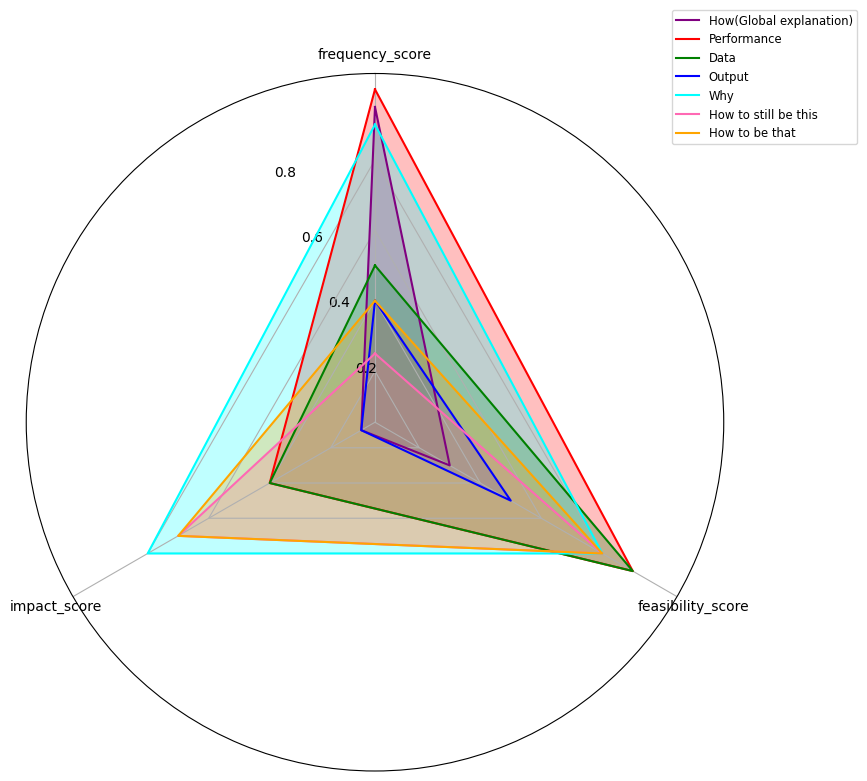

In [40]:
def example_data():
    # Define the labels and data for plotting
    labels = ['frequency_score','impact_score','feasibility_score']
    data = [
        [0.95,0.1,0.3],
        [1,0.4,.9],
        [0.5,0.4,0.9],
        [0.4,0.1,0.5],
        [0.9,0.8,0.8],
        [0.25,0.7,0.8],
        [0.4,0.7,0.8]
    ]
    return labels,data
   




if __name__ == '__main__':
    num_vars = 3  # Number of question categories
    theta = radar_factory(num_vars)

    labels, data = example_data()
    
    # Define colors for each variable
    colors = ['purple', 'red', 'green', 'blue', 'cyan','hotpink','orange']  # Use 3 distinct colors

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    #ax.set_title('Single Case', weight='bold', size='medium', position=(0.5, 1.1),
                 #horizontalalignment='center', verticalalignment='center')

    # Plot each variable's data
    for d, color in zip(data, colors):
        values = d  # Append the first value to close the loop
        ax.plot(theta, values, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')

    ax.set_varlabels(labels)

    # Add legend
    labels_legend = ['How(Global explanation)', 'Performance', 'Data', 'Output', 'Why', 'How to still be this', 'How to be that']
    ax.legend(labels_legend, loc='upper right', bbox_to_anchor=(1.2, 1.1),
              labelspacing=0.5, fontsize='small')

    '''fig.text(0.5, 0.965, 'Priority of Question Categories',
             horizontalalignment='center', color='black', weight='bold',
             size='large')'''

    plt.show()